Student Performance Indicator


Life cycle of Machine learning Project
1.Understanding the Problem Statement
2.Data Collection
3.Data Checks to perform
4.Exploratory data analysis
5.Data Pre-Processing
6.Model Training
7.hoose best model


1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.


## Importing Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Import CSV

In [7]:
df=pd.read_csv(r'C:\Users\p_yenkar\Desktop\Personal\Study\Python_Practice\End_To_End_ML_Project\notebook\data\stud.csv')

In [8]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.tail(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
df.shape

(1000, 8)

In [15]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [17]:
df.count()

gender                         1000
race_ethnicity                 1000
parental_level_of_education    1000
lunch                          1000
test_preparation_course        1000
math_score                     1000
reading_score                  1000
writing_score                  1000
dtype: int64

In [18]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values

In [24]:
df.duplicated().sum()

0

### There are no duplicates

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [28]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
print("Categories in Gender-",df['gender'].unique())
print("categories in race/ethinicity-",df['race_ethnicity'].unique())
print("categories in parental_level_of_education-",df['parental_level_of_education'].unique())
print("categories in lunch-",df['lunch'].unique())
print("categories in test_preparation_course -",df['test_preparation_course'].unique())


Categories in Gender- ['female' 'male']
categories in race/ethinicity- ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch- ['standard' 'free/reduced']
categories in test_preparation_course - ['none' 'completed']


In [39]:
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
print(f"There are {len(numerical_features)} Numerical Features which are {numerical_features}")

categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print(f"There are {len(categorical_features)} Numerical Features which are {categorical_features}")


There are 3 Numerical Features which are ['math_score', 'reading_score', 'writing_score']
There are 5 Numerical Features which are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding col for Total Scope and Average

In [41]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['total_score']/3


In [42]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
math_full = df[df['math_score']==100]['gender'].count()
reading_full=df[df['reading_score']==100]['gender'].count()
writing_full=df[df['writing_score']==100]['gender'].count()
print(f"Number of students getting full marks in Maths are : {math_full}")
print(f"Number of students getting full marks in reading are : {reading_full}")
print(f"Number of students getting full marks in writing are : {writing_full}")

Number of students getting full marks in Maths are : 7
Number of students getting full marks in reading are : 17
Number of students getting full marks in writing are : 14


### Histogram and KDE

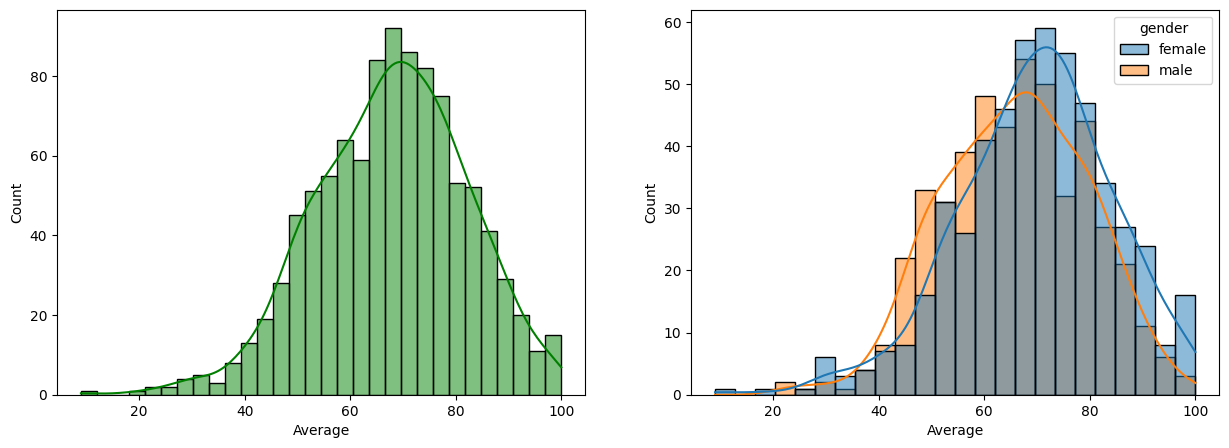

In [57]:
fig,axs =plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.histplot (data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

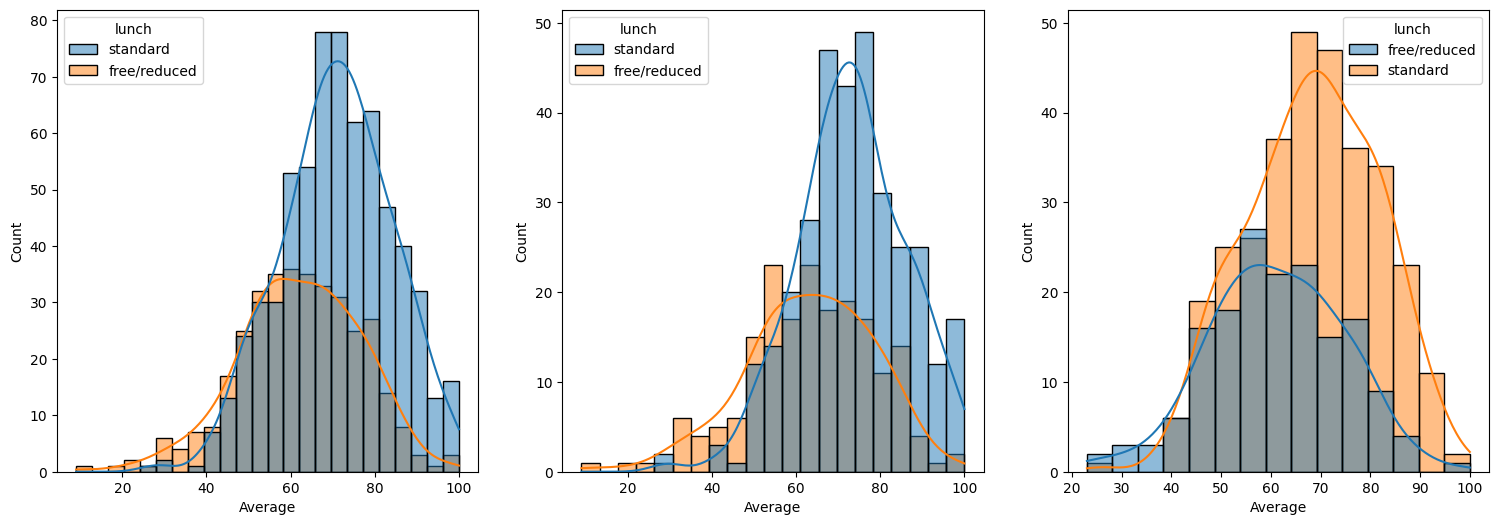

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

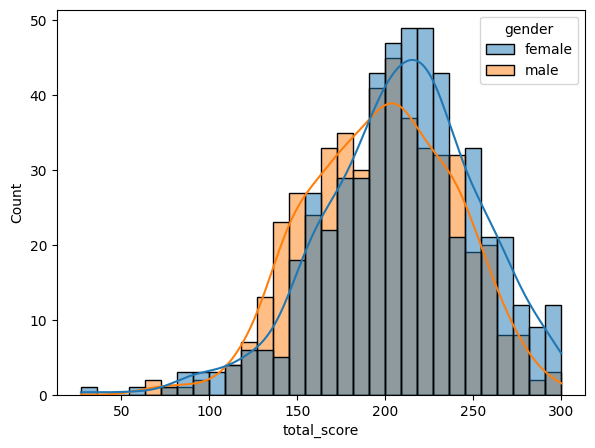

In [64]:
fig,axs =plt.subplots(1,1,figsize=(15,5))
plt.subplot(121)
sns.histplot (data=df,x='total_score',bins=30,kde=True,color='g',hue='gender')

plt.show()

### Female students performed better than Male students

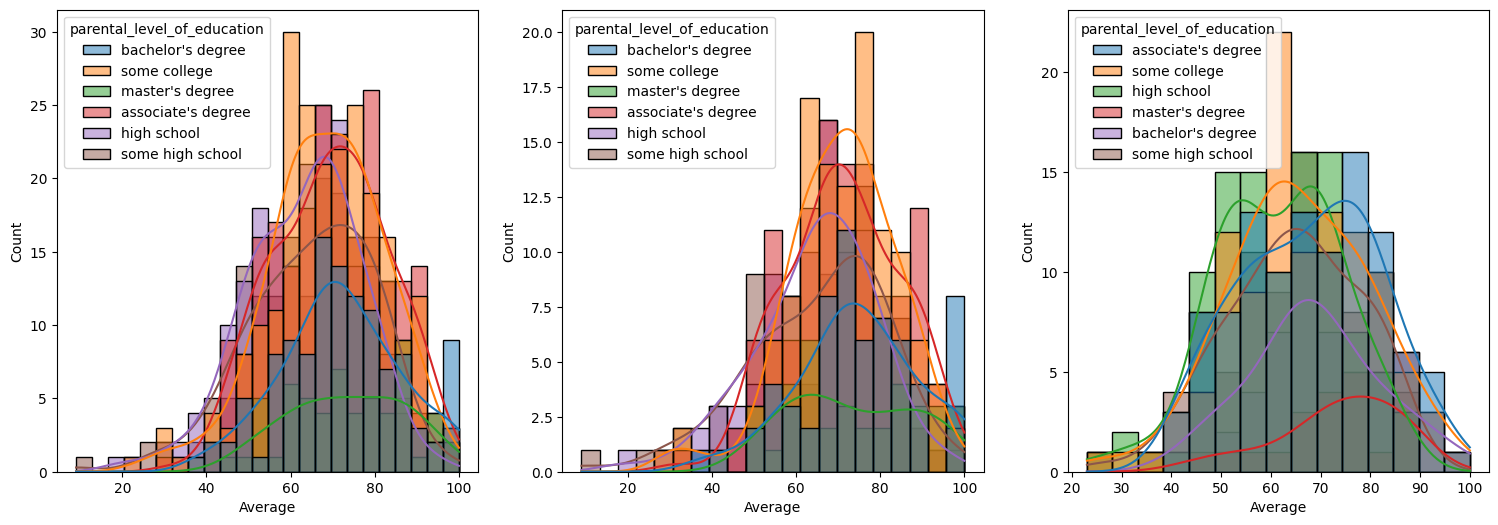

In [65]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

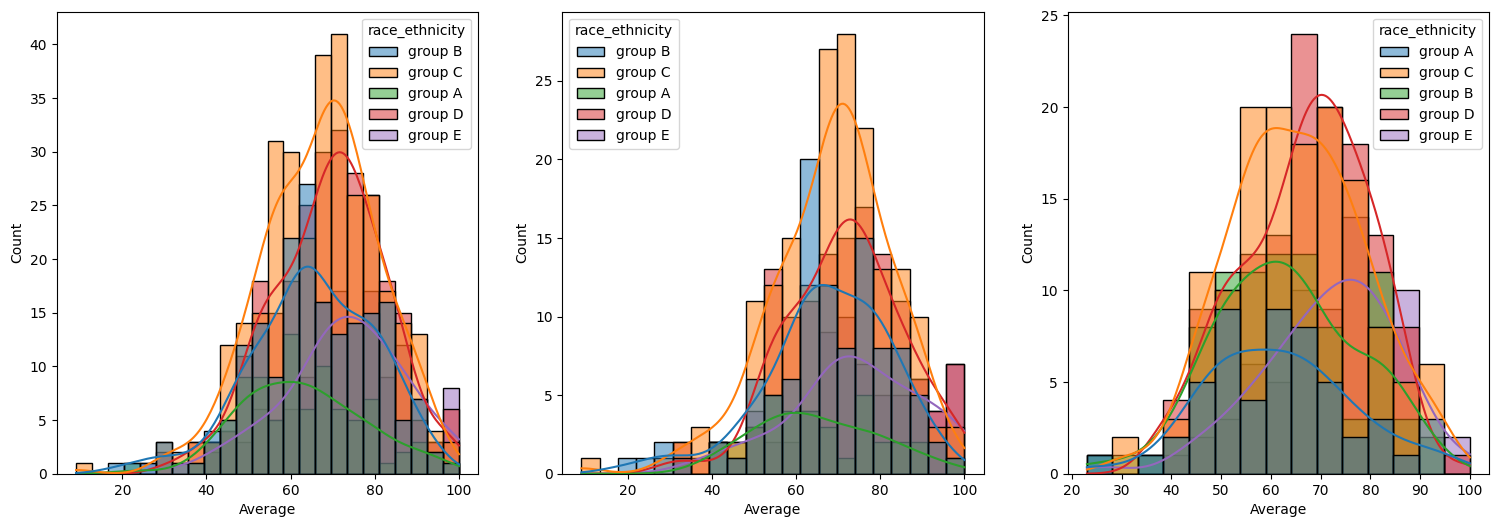

In [66]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

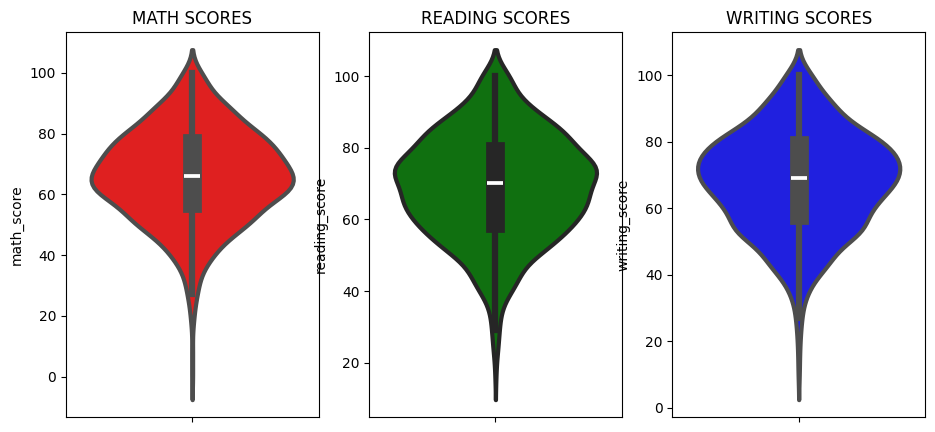

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate Analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

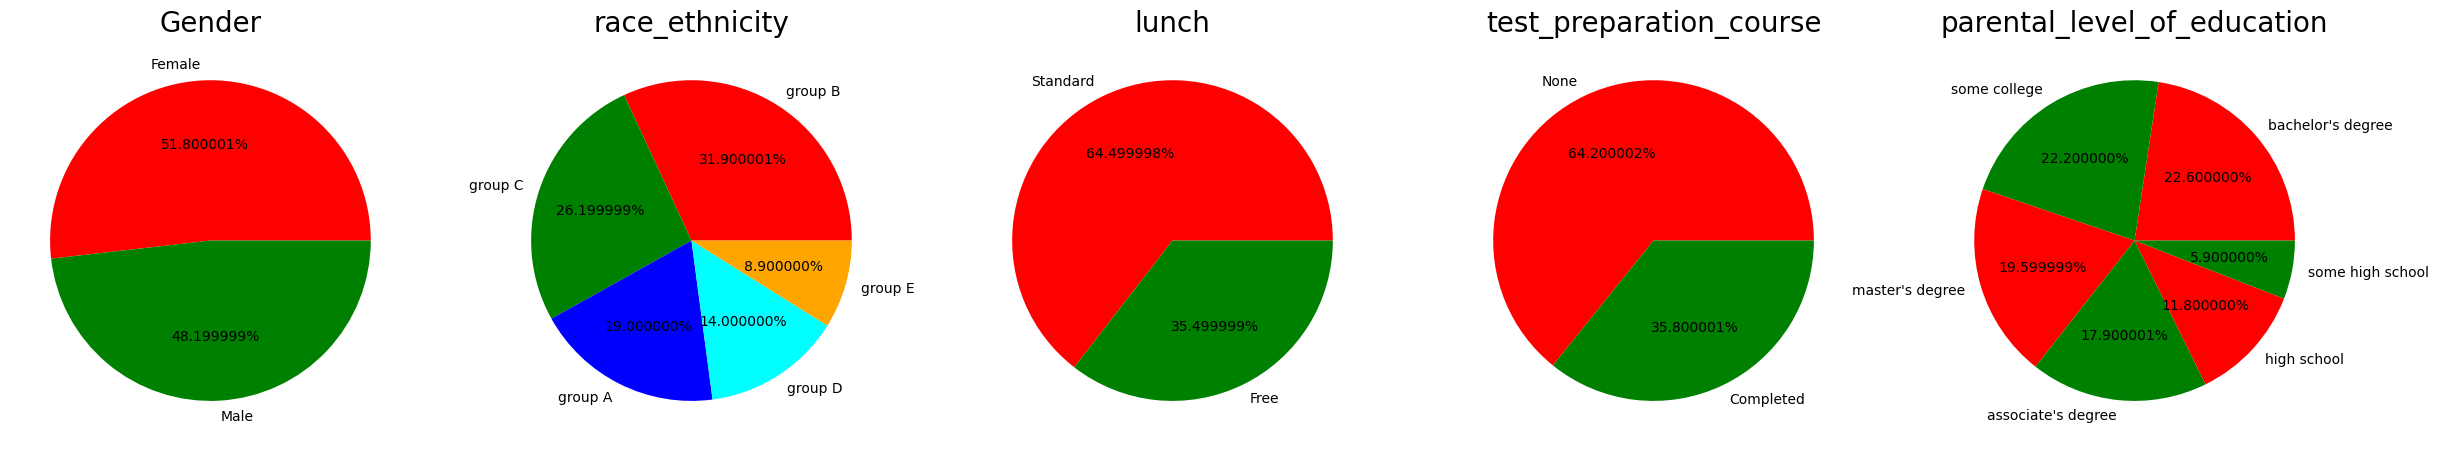

In [84]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group B' ,'group C', 'group A', 'group D', 'group E'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')



plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('test_preparation_course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels="bachelor's degree", 'some college', "master's degree" ,"associate's degree", 'high school', 'some high school'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')









#### Insights
#### Num of students having std lunch are greater
#### Students not have enrolled for test preperation course is greater
#### students whose parental education is some college is greater followed closely by associates #### degree

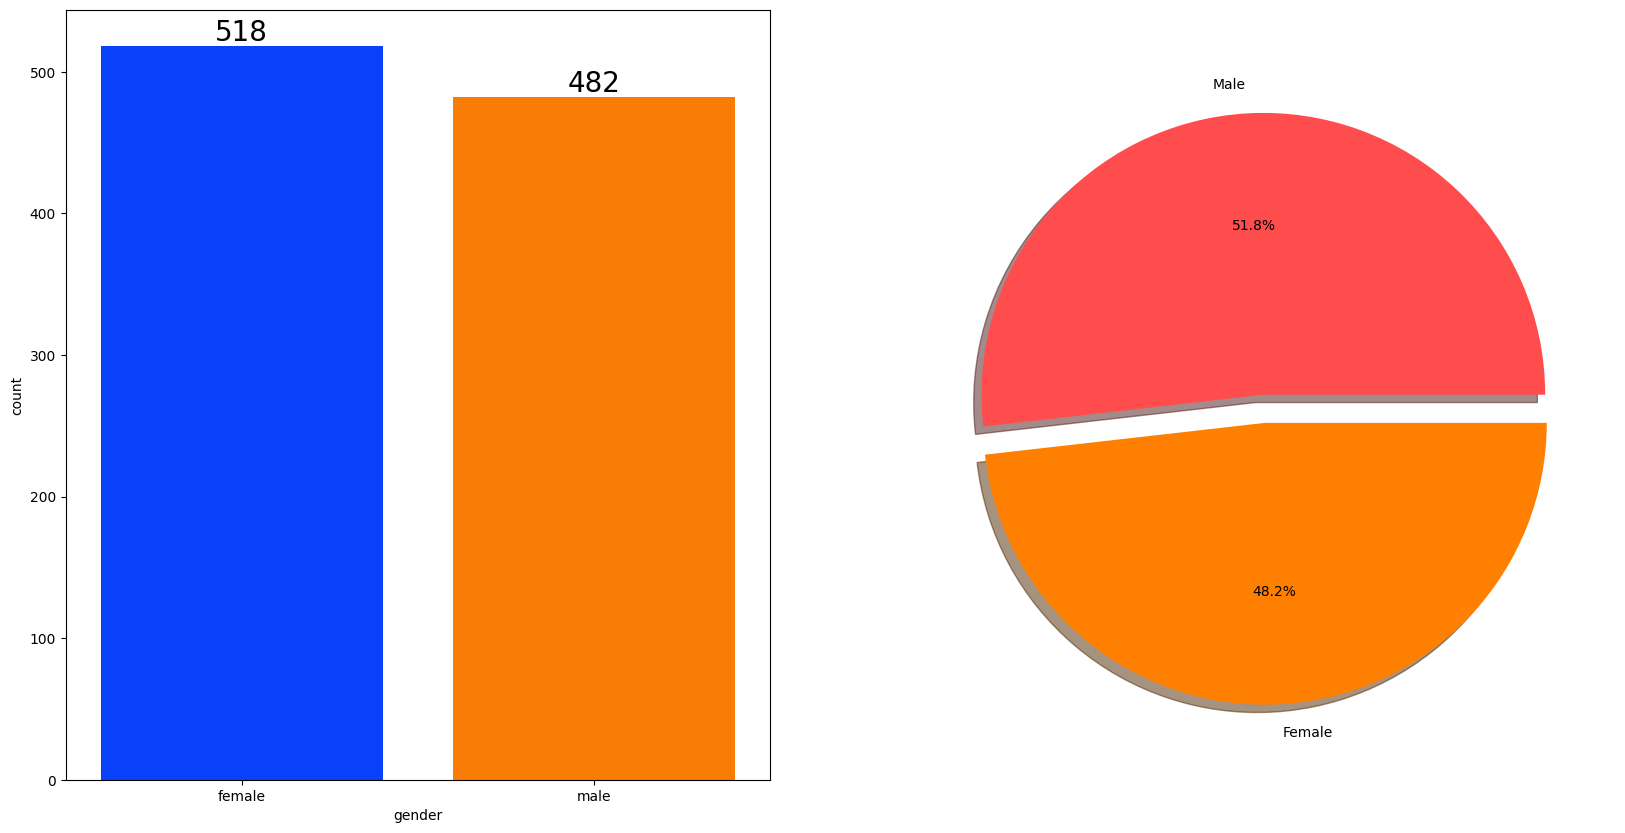

In [88]:
f,ax =plt.subplots(1,2,figsize =(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()